# Data exploration




In [1]:
import multiresolutionimageinterface as mri
import pandas as pd
import numpy as np
import os
from os.path import join
import matplotlib.pyplot as plt
import getpass  # get user name
%matplotlib inline
from sklearn.utils import shuffle
from tqdm import tqdm

In [6]:
mr_image = mri.MultiResolutionImageReader().open(image_path)
x_dim, y_dim = mr_image.getDimensions()

In [7]:
level = 3
img = mr_image.getUCharPatch(startX=0,startY=0, width=x_dim//2**level, height=y_dim//2**level, level=level)

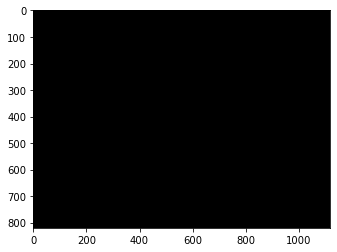

In [3]:
def readImage(image_path, level=4):
    """
    Reads a complete WSI and returns a numpy array 
    In a WSI, at each higher resolution level the size is decreased by half.
    For this reason the dimensions should be decreased by 2^level for a given image resolution level

    returns: image numpy array 
    """
    # Open wsi image
    mr_image = mri.MultiResolutionImageReader().open(image_path)
    # Get Dimensions
    x_dim, y_dim = mr_image.getDimensions()
    # 
    img = mr_image.getUCharPatch(startX=0,startY=0, width=x_dim//2**level, height=y_dim//2**level, level=level)
    
    return img

# plot single image
image_path = r'Z:\archives\lung\TCGA_paper_data\0000b231-7c05-4e2e-8c9e-6d0675bfbb34\TCGA-55-8514-01A-01-TS1.0e0f5cf3-96e9-4a35-aaed-4340df78d389.svs'
img = readImage(image_path, level=4)
plt.imshow(img)

In [16]:
tiles

['16_7.jpeg',
 '16_14.jpeg',
 '13_24.jpeg',
 '24_18.jpeg',
 '3_23.jpeg',
 '20_18.jpeg',
 '7_23.jpeg',
 '15_9.jpeg',
 '17_24.jpeg',
 '12_14.jpeg',
 '2_22.jpeg',
 '25_19.jpeg',
 '28_18.jpeg',
 '17_15.jpeg',
 '13_15.jpeg',
 '16_25.jpeg',
 '6_22.jpeg',
 '20_5.jpeg',
 '21_19.jpeg',
 '18_9.jpeg',
 '15_26.jpeg',
 '10_16.jpeg',
 '5_21.jpeg',
 '8_20.jpeg',
 '21_3.jpeg',
 '13_8.jpeg',
 '1_21.jpeg',
 '14_16.jpeg',
 '11_26.jpeg',
 '19_17.jpeg',
 '9_21.jpeg',
 '4_20.jpeg',
 '30_15.jpeg',
 '17_1.jpeg',
 '11_17.jpeg',
 '26_4.jpeg',
 '18_16.jpeg',
 '15_17.jpeg',
 '7_16.jpeg',
 '12_21.jpeg',
 '17_11.jpeg',
 '13_11.jpeg',
 '16_21.jpeg',
 '20_1.jpeg',
 '16_10.jpeg',
 '13_20.jpeg',
 '16_3.jpeg',
 '24_8.jpeg',
 '6_17.jpeg',
 '17_20.jpeg',
 '12_10.jpeg',
 '27_6.jpeg',
 '9_25.jpeg',
 '19_22.jpeg',
 '11_13.jpeg',
 '14_23.jpeg',
 '17_5.jpeg',
 '30_11.jpeg',
 '10_23.jpeg',
 '15_13.jpeg',
 '18_12.jpeg',
 '8_15.jpeg',
 '31_10.jpeg',
 '15_22.jpeg',
 '10_12.jpeg',
 '18_23.jpeg',
 '8_24.jpeg',
 '22_9.jpeg',
 '9_14.j

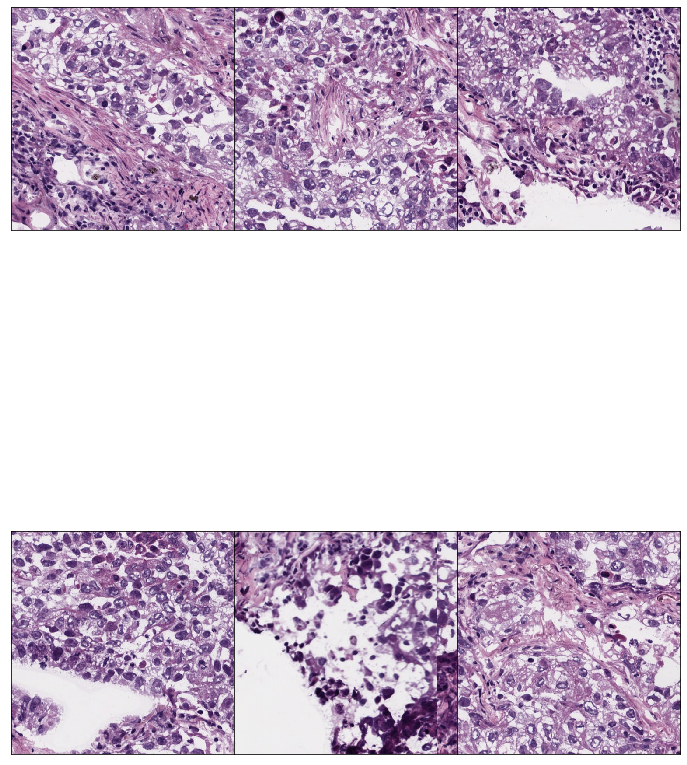

In [58]:
path = r'Z:\users\gabriel\512px_Tiled\TCGA-05-4398-01A-01-TS1.061af2c7-1143-430d-8286-1996405ab057_files\20.0'
tiles = os.listdir(path)

def tiles_plot(m,n, t):
    fig, axs = plt.subplots(m,n,figsize=t)
    axs = axs.ravel()
    
    for i in range(m*n):
        img = plt.imread(os.path.join(path,tiles[i]))
        axs[i].imshow(img)
        axs[i].set_xticks([])
        axs[i].set_yticks([])
#         axs[i].set_title(col_names[i])
    plt.subplots_adjust(top = 0.9, bottom=0.01, hspace=.20, wspace=0.0)
    
tiles_plot(2,3, (12,15))

522 Tiles in from one sammple image
Images shape: (512, 512, 3)


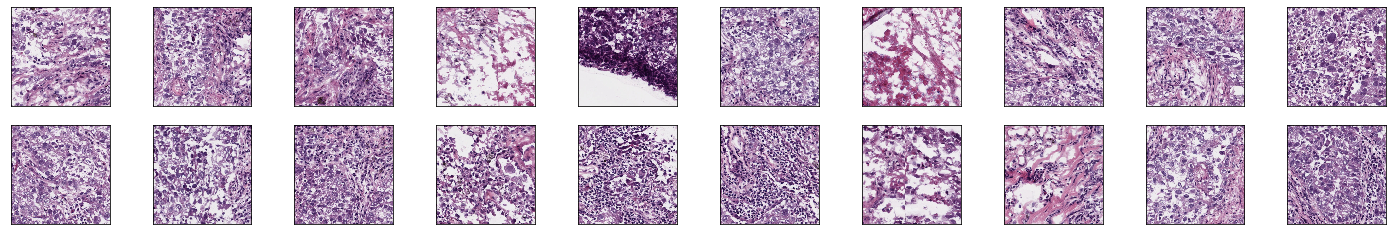

In [56]:
# Get plots for visualization

path = r'Z:\users\gabriel\512px_Tiled\TCGA-05-4398-01A-01-TS1.061af2c7-1143-430d-8286-1996405ab057_files\20.0'
tiles = os.listdir(path)

print(f'{len(tiles)} Tiles in from one sammple image')
 
rows = 2; columns = 10;
fig, axs = plt.subplots(rows,columns,figsize=(25,4))
axs = axs.ravel()

n_images = rows * columns

for idx, file_name in enumerate(np.random.choice(tiles, n_images)):
# for idx, file_name in zip((tiles, n_images)):
    img = plt.imread(os.path.join(path,file_name))
    if idx == 0: print(f'Images shape: {img.shape}')
    axs[idx].imshow(img)
    axs[idx].get_xaxis().set_visible(False)
    axs[idx].get_yaxis().set_visible(False)